**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

plotLab = np.genfromtxt("data/mystery_data_1.csv", skip_header = 2, delimiter=",")
print(plotLab[:10])
print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



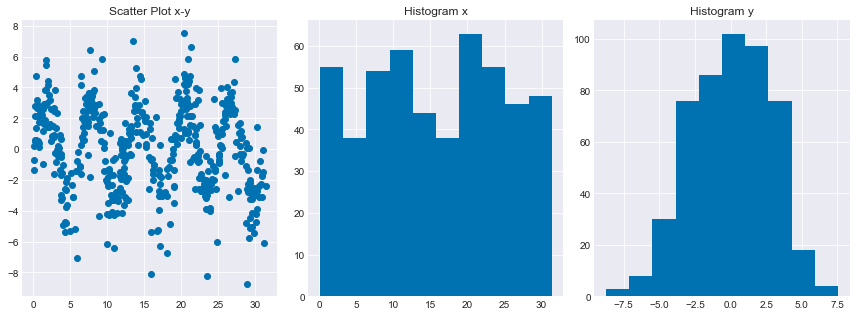

In [78]:
n_bins = 10
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)
axs[0].scatter(plotLab[:,0], plotLab[:,1])
axs[0].set_title("Scatter Plot x-y")
axs[1].hist(plotLab[:,0], bins=10)
axs[1].set_title("Histogram x")
axs[2].hist(plotLab[:,1], bins=10)
axs[2].set_title("Histogram y")
plt.show()

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [72]:
import scipy.linalg
A = plotLab[:,0].reshape((500,1))
y = plotLab[:,1].reshape((500,1))
Ahat = np.hstack([np.ones([len(A),1]), A])
c, res, _, _ = scipy.linalg.lstsq(Ahat, y)
resid = y - Ahat @ c
R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)
print('c: ', c.reshape(2))
print('residues: ', res[0])
print('r2: ', R2)
print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

c:  [ 0.92884793 -0.05650709]
residues:  3722.8001542015754
r2:  0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



## 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

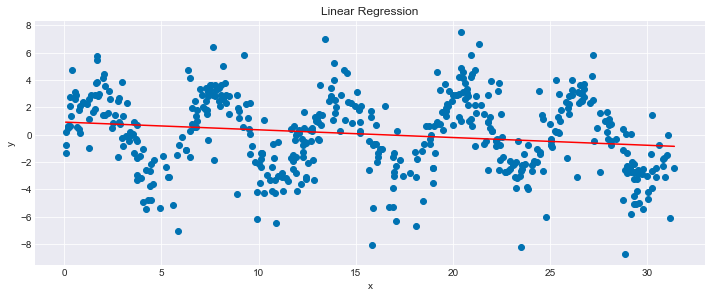

In [86]:
plt.scatter(plotLab[:,0], plotLab[:,1])
xline = np.linspace(plotLab[:,0].min(), plotLab[:,0].max(), num = 100)
rline = c[0] + c[1]*xline
plt.plot( xline, rline, 'r')

plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

I don't think it is a good model because the $R^2$ value is small, as 1 the the cap. Also, through the plot we could see that the plot is Oscillating closer and further to the plot, showing it is a poor linear prediction line.